# Analysis

* Although urban rides comprise a large majority of the total rides, they generally producse lower average fares.  Increading suburban and rural ridership should lead to greater overall revenue.
* There are significantly fewer rural drivers than suburban or urban, despite the fact that rural trips produce larger fares (probably because of the greater distances traveled). Incentiving more rural carowners to participate could lead to large increases in revenue.
* Suburban rides also produce larger average fares compared to urban trips, and compared to their share of total rides.  Increasing ridership in both of those city categories could produce greater than expected revenue increases.

In [106]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
#create a file path
city_path = "raw_data/city_data.csv"
ride_path = "raw_data/ride_data.csv"

In [108]:
#save csv's into a pandas dataframe
cities = pd.read_csv(city_path)
rides = pd.read_csv(ride_path)

In [109]:
#merge the cities df and the rides df on "city"
df = pd.merge(cities, rides, on="city")

In [110]:
#create a summary dataframe based with the city as index for calculations
summary_df = df.groupby(df["city"]).size()
summary_df = pd.DataFrame(summary_df)
summary_df = summary_df.rename(columns={0: "total_rides"})

In [111]:
#add sum of fares and average fare to the summary dataframe
summary_df["sum_fares"] = df.groupby(["city"]).sum()["fare"]
summary_df["average_fare"] = summary_df["sum_fares"] / summary_df["total_rides"]

In [112]:
summary_df = summary_df.reset_index()
summary_df = pd.merge(summary_df, cities, how="right", on="city")

In [113]:
#create variables by type
#nineth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
urban = summary_df.loc[(summary_df['type'] == 'Urban')]
suburban = summary_df.loc[(summary_df['type'] == 'Suburban')]
rural = summary_df.loc[(summary_df['type'] == "Rural")]

<function matplotlib.pyplot.show>

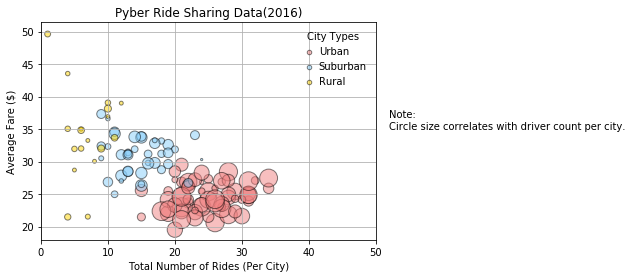

In [114]:
#build the bubble plot
#create variables from the summary dataframe

plt.scatter(urban["total_rides"], urban['average_fare'], marker="o", color='lightcoral', edgecolors="black", linewidths=1, s=5*urban['driver_count'], alpha=0.5, label="Urban")
plt.scatter(suburban["total_rides"], suburban['average_fare'], marker="o", color='lightskyblue', edgecolors="black", linewidths=1, s=5*suburban['driver_count'], alpha=0.5, label="Suburban")
plt.scatter(rural["total_rides"], rural['average_fare'], marker="o", color='gold', edgecolors="black", linewidths=1, s=5*rural['driver_count'], alpha=0.5, label="Rural")
plt.grid(True)
plt.xlim(0,50)
plt.title ("Pyber Ride Sharing Data(2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

#legend
legend = plt.legend(title="City Types", frameon=False, handletextpad=0)
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]

#note
plt.text(52,35, "Note: \nCircle size correlates with driver count per city.")

plt.show

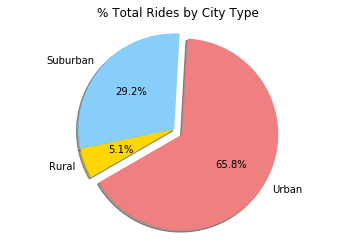

In [115]:
#create the pie chart for total rides by city type
urban_rides = urban.sum()["total_rides"]
suburban_rides = suburban.sum()["total_rides"]
rural_rides = rural.sum()["total_rides"]
labels = ['Urban', 'Suburban', 'Rural']
pie_rides = [urban_rides, suburban_rides, rural_rides]
colors = ["lightcoral", "lightskyblue" , "gold" ]
explode = [0.1,0,0]

plt.pie(pie_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title("% Total Rides by City Type")
plt.show()

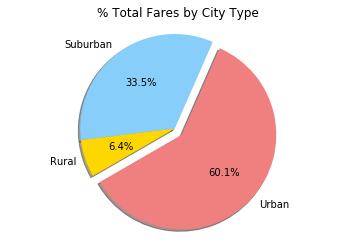

In [116]:
#create the pie chart for total fares by city type
urban_fares = urban.sum()["sum_fares"]
suburban_fares = suburban.sum()["sum_fares"]
rural_fares = rural.sum()["sum_fares"]
labels = ['Urban', 'Suburban', 'Rural']
pie_fares = [urban_fares, suburban_fares, rural_fares]
colors = ["lightcoral", "lightskyblue" , "gold" ]
explode = [0.1,0,0]

plt.pie(pie_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title("% Total Fares by City Type")
plt.show()

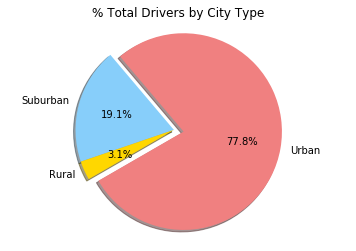

In [117]:
#create the pie chart for % of Total Drivers by City Type
urban_drivers = urban.sum()["driver_count"]
suburban_drivers = suburban.sum()["driver_count"]
rural_drivers = rural.sum()["driver_count"]
labels = ['Urban', 'Suburban', 'Rural']
pie_drivers = [urban_drivers, suburban_drivers, rural_drivers]
colors = ["lightcoral", "lightskyblue" , "gold" ]
explode = [0.1,0,0]

plt.pie(pie_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title("% Total Drivers by City Type")
plt.show()